<div style="text-align:center;font-size:22pt; font-weight:bold;color:white;border:solid black 1.5pt;background-color:#1e7263;">
    Understanding Model History Object: Classification Task
</div>

In [1]:
# ======================================================================= #
# Course: Deep Learning Complete Course (CS-501)
# Author: Dr. Saad Laouadi
# Institution: Quant Coding Versity Academy
# Date: December 25, 2024
#
# ==========================================================
# Lesson: Understanding Model History Object in Keras
#         Analyzing and Visualizing Training Progress
# ==========================================================
# ## Learning Objectives
# This guide will enable you to:
# 1. Access and interpret the model.fit() history object
# 2. Extract and analyze training metrics over epochs
# 3. Visualize training and validation metrics
# 4. Identify optimal training epochs and model performance
# 5. Detect overfitting through history analysis
# =======================================================================
#          Copyright © Dr. Saad Laouadi 2024
# =======================================================================

In [2]:
# ==================================================== #
#        Load Required Libraries
# ==================================================== #

import os  
from pathlib import Path
from pprint import pprint    
import json

# Disable Metal API Validation
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"  


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             roc_curve,
                             auc,
                             precision_recall_curve
                            )

import tensorflow as tf

# Set styling for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*72)

%reload_ext watermark
%watermark -a "Dr. Saad Laouadi" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)

# Global Config
SAVE = False

Author: Dr. Saad Laouadi

Last updated: 2024-12-25

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Imported Packages and Their Versions:
tensorflow: 2.16.2
pandas    : 2.2.2
seaborn   : 0.13.2
numpy     : 1.26.4
json      : 2.0.9
sklearn   : 1.5.1
matplotlib: 3.9.2



In [3]:
# ==================================================== #
#        Load and Explore the data
# ==================================================== #
# Load Breast Cancer dataset from sklearn
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Quick look at the data
print("Dataset Shape:", X.shape)
print("\nFeatures:")
print(X.describe())

Dataset Shape: (569, 30)

Features:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.0000

In [4]:
# ==================================================== #
#        Prepare the data for model
# ==================================================== #
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=101,
                                                    stratify=y)

In [5]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# ==================================================== #
#        Model Definition and Compilation
# ==================================================== #
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile with multiple metrics
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

In [7]:
# ==================================================== #
#        Model Training with History
# ==================================================== #
# Train the model and store history
history = model.fit(X_train_scaled, y_train,
                   validation_split=0.2,
                   epochs=50,
                   batch_size=32,
                   verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - AUC: 0.8123 - Precision: 0.7832 - Recall: 0.1643 - accuracy: 0.4717 - loss: 0.6797 - val_AUC: 0.9871 - val_Precision: 1.0000 - val_Recall: 0.8421 - val_accuracy: 0.9011 - val_loss: 0.4516
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.9880 - Precision: 0.9708 - Recall: 0.9246 - accuracy: 0.9373 - loss: 0.3935 - val_AUC: 0.9910 - val_Precision: 0.9500 - val_Recall: 1.0000 - val_accuracy: 0.9670 - val_loss: 0.2731
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.9908 - Precision: 0.9359 - Recall: 0.9873 - accuracy: 0.9485 - loss: 0.2598 - val_AUC: 0.9907 - val_Precision: 0.9344 - val_Recall: 1.0000 - val_accuracy: 0.9560 - val_loss: 0.1789
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.9928 - Precision: 0.9356 - Recall: 0.9938 - accuracy: 0.9523 - loss: 0.1685 - val_AUC: 0.9907 - val_Precision: 0.9344 - val_Recall: 1.0000 - val_accuracy: 0.9560 - val_loss: 0.1383
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━

In [8]:
# ==================================================== #
#        Detailed History Object Analysis
# ==================================================== #

# Understanding the basic structure
print("Type of history object:", type(history))

# List history methods and attributes (properties)
print("\nHistory object attributes:\n",
      [att for att in dir(history) if not att.startswith('_')])

Type of history object: <class 'keras.src.callbacks.history.History'>

History object attributes:
 ['epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params']


In [9]:
# Getting available metrics
print("\nHistory dictionary keys:", history.history.keys())


History dictionary keys: dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


In [10]:
# ==================================================== #
#        Analysis of Training History
# ==================================================== #
# Convert history to DataFrame for easy analysis
history_df = pd.DataFrame(history.history)
print(history_df.head(3))

        AUC  Precision    Recall  accuracy      loss   val_AUC  val_Precision  \
0  0.896091   0.958333  0.302632  0.554945  0.633536  0.987100       1.000000   
1  0.980037   0.951327  0.942982  0.934066  0.381071  0.990970       0.950000   
2  0.988293   0.937759  0.991228  0.953297  0.238593  0.990712       0.934426   

   val_Recall  val_accuracy  val_loss  
0    0.842105      0.901099  0.451623  
1    1.000000      0.967033  0.273148  
2    1.000000      0.956044  0.178948  


In [11]:
# print the epochs
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [12]:
# Add epoch numbers
history_df['epoch'] = [history.epoch[i] + 1 for i in range(len(history_df)) ]

print(history_df.head())

        AUC  Precision    Recall  accuracy      loss   val_AUC  val_Precision  \
0  0.896091   0.958333  0.302632  0.554945  0.633536  0.987100       1.000000   
1  0.980037   0.951327  0.942982  0.934066  0.381071  0.990970       0.950000   
2  0.988293   0.937759  0.991228  0.953297  0.238593  0.990712       0.934426   
3  0.991212   0.941423  0.986842  0.953297  0.165310  0.990712       0.934426   
4  0.991970   0.949367  0.986842  0.958791  0.131078  0.992518       0.934426   

   val_Recall  val_accuracy  val_loss  epoch  
0    0.842105      0.901099  0.451623      1  
1    1.000000      0.967033  0.273148      2  
2    1.000000      0.956044  0.178948      3  
3    1.000000      0.956044  0.138252      4  
4    1.000000      0.956044  0.115134      5  


In [13]:
# Find best epochs for different metrics
best_acc_epoch = history_df['val_accuracy'].idxmax() + 1
best_loss_epoch = history_df['val_loss'].idxmin() + 1

print("\nBest Performance:")
print(f"Best validation accuracy at epoch {best_acc_epoch}")
print(f"Best validation loss at epoch {best_loss_epoch}")


Best Performance:
Best validation accuracy at epoch 13
Best validation loss at epoch 14


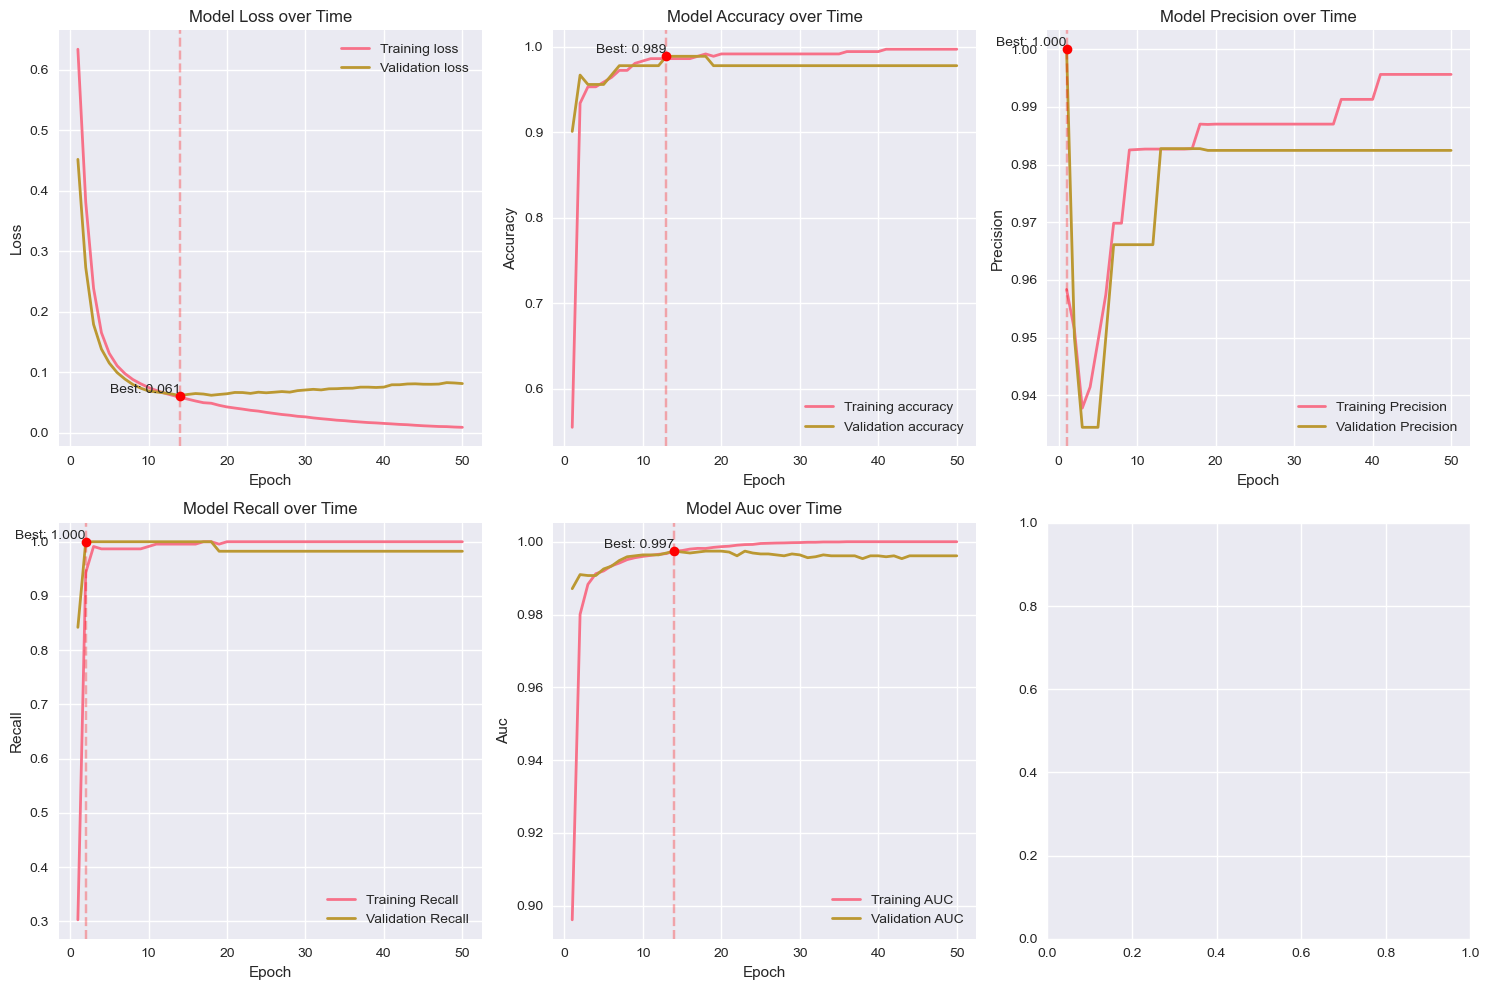

In [14]:
# ==================================================== #
#        Advanced Metrics Visualization
# ==================================================== #
# Create subplots for all metrics
metrics = ['loss', 'accuracy', 'Precision', 'Recall', 'AUC']
n_metrics = len(metrics)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    ax.plot(history_df['epoch'], history_df[metric], 
            label=f'Training {metric}', linewidth=2)
    ax.plot(history_df['epoch'], history_df[f'val_{metric}'], 
            label=f'Validation {metric}', linewidth=2)
    ax.set_title(f'Model {metric.capitalize()} over Time')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.capitalize())
    ax.legend()
    
    # Mark best epoch
    if metric == 'loss':
        best_epoch = history_df[f'val_{metric}'].idxmin() + 1
        best_value = history_df[f'val_{metric}'].min()
    else:
        best_epoch = history_df[f'val_{metric}'].idxmax() + 1
        best_value = history_df[f'val_{metric}'].max()
        
    ax.axvline(x=best_epoch, color='r', linestyle='--', alpha=0.3)
    ax.plot(best_epoch, best_value, 'ro')
    ax.text(best_epoch, best_value, f'Best: {best_value:.3f}',
            horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()
plt.show()

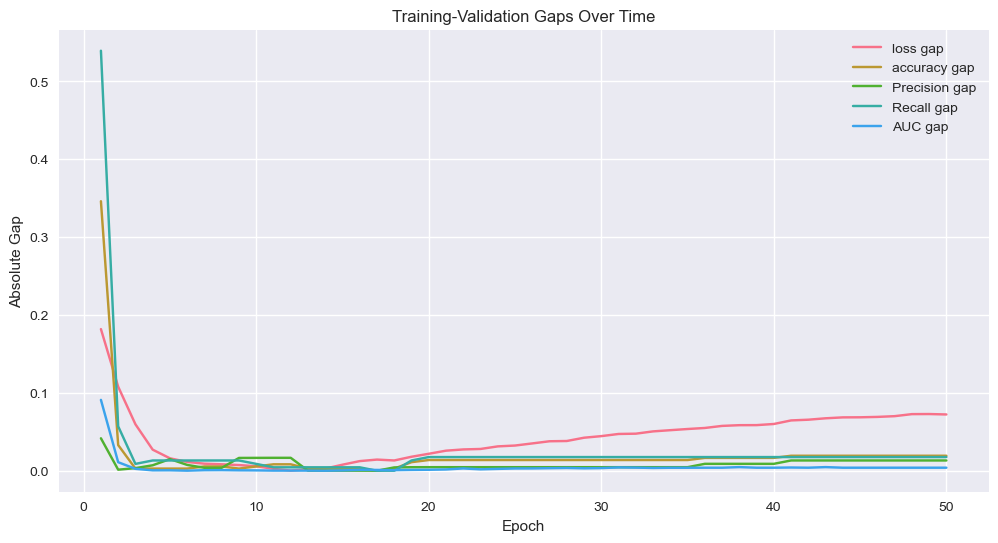

In [15]:
# ==================================================== #
#        Training-Validation Gap Analysis
# ==================================================== #
# Calculate gaps between training and validation
for metric in metrics:
    history_df[f'{metric}_gap'] = (history_df[metric] - 
                                  history_df[f'val_{metric}']).abs()
    
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(history_df['epoch'], history_df[f'{metric}_gap'], 
             label=f'{metric} gap')
plt.title('Training-Validation Gaps Over Time')
plt.xlabel('Epoch')
plt.ylabel('Absolute Gap')
plt.legend()
plt.grid(True)
plt.show()

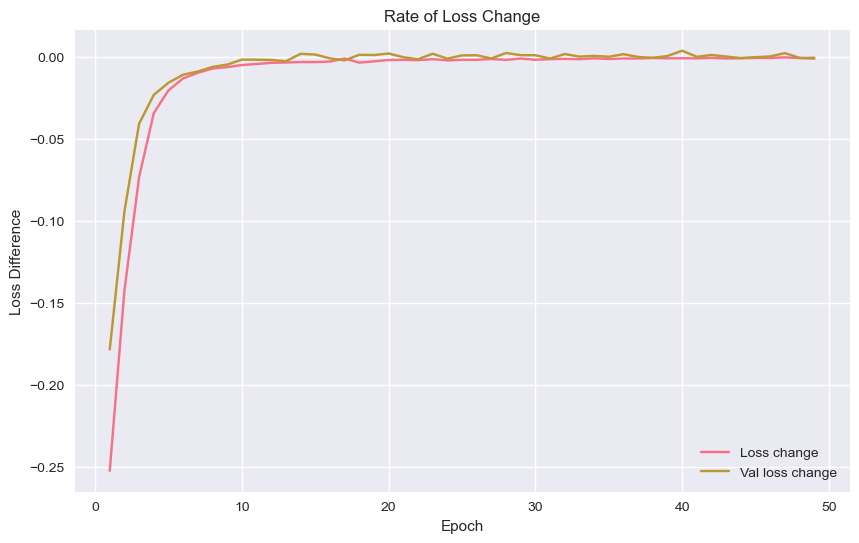

In [16]:
# ==================================================== #
#        Learning Rate Analysis
# ==================================================== #
# Plot loss vs learning rate
plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'].diff(), label='Loss change')
plt.plot(history_df['val_loss'].diff(), label='Val loss change')
plt.title('Rate of Loss Change')
plt.xlabel('Epoch')
plt.ylabel('Loss Difference')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# ==================================================== #
#        Export Training History
# ==================================================== #
# Save history to CSV for further analysis
history_df.to_csv('training_history.csv', index=False)

# Create training summary
training_summary = {
    'total_epochs': len(history_df),
    'best_val_accuracy': history_df['val_accuracy'].max(),
    'best_val_loss': history_df['val_loss'].min(),
    'final_val_accuracy': history_df['val_accuracy'].iloc[-1],
    'final_val_loss': history_df['val_loss'].iloc[-1],
    'best_accuracy_epoch': best_acc_epoch,
    'best_loss_epoch': best_loss_epoch
}

print("\nTraining Summary:")
for metric, value in training_summary.items():
    print(f"{metric}: {value}")


Training Summary:
total_epochs: 50
best_val_accuracy: 0.9890109896659851
best_val_loss: 0.061363402754068375
final_val_accuracy: 0.9780219793319702
final_val_loss: 0.0812414214015007
best_accuracy_epoch: 13
best_loss_epoch: 14


In [18]:
# ============================================================== #
#          Advanced Analysis of History Object
# ============================================================== #


# ==================================================== #
#        Epoch Information
# ==================================================== #
# Number of epochs trained
print("\nNumber of epochs trained:", len(history.epoch))
print("Epoch numbers:", history.epoch)  # 0-based indexing


Number of epochs trained: 50
Epoch numbers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [19]:
# ==================================================== #
#        Model Configuration
# ==================================================== #
# Access model configuration from history
print("\nModel Configuration:")
print("Model used:", history.model)
print("\nModel Parameters:", history.model.count_params())
print("\nModel Architecture:")
history.model.summary()


Model Configuration:
Model used: <Sequential name=sequential, built=True>

Model Parameters: 4097

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,293 (48.02 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,196 (32.02 KB)

In [20]:
# ==================================================== #
#        Training Params
# ==================================================== #
# Extract training parameters
print("\nTraining Parameters:", history.params.keys())
print()
print("Batch Size:", history.params.get('batch_size'))
print("Number of Epochs:", history.params.get('epochs'))
print("Steps per Epoch:", history.params.get('steps'))
print("Samples:", history.params.get('samples'))
print("Validation Steps:", history.params.get('validation_steps'))


Training Parameters: dict_keys(['verbose', 'epochs', 'steps'])

Batch Size: None
Number of Epochs: 50
Steps per Epoch: 12
Samples: None
Validation Steps: None


In [21]:
# ==================================================== #
#        Metric Trends Analysis
# ==================================================== #
# Calculate trend statistics
for metric in history.history.keys():
    if 'val' not in metric:               # Only for training metrics
        values = history.history[metric]
        print(f"\n{metric.capitalize()} Trends:")
        print(f"\t{'Starting value:':<20} {values[0]:.4f}")
        print(f"\t{'Ending value:':<20} {values[-1]:.4f}")
        print(f"\t{'Improvement:':<20} {values[-1] - values[0]:.4f}")
        print(f"\t{'Best value:':<20} {max(values):.4f}")
        print(f"\t{'Worst value:':<20} {min(values):.4f}")


Auc Trends:
	Starting value:      0.8961
	Ending value:        1.0000
	Improvement:         0.1039
	Best value:          1.0000
	Worst value:         0.8961

Precision Trends:
	Starting value:      0.9583
	Ending value:        0.9956
	Improvement:         0.0373
	Best value:          0.9956
	Worst value:         0.9378

Recall Trends:
	Starting value:      0.3026
	Ending value:        1.0000
	Improvement:         0.6974
	Best value:          1.0000
	Worst value:         0.3026

Accuracy Trends:
	Starting value:      0.5549
	Ending value:        0.9973
	Improvement:         0.4423
	Best value:          0.9973
	Worst value:         0.5549

Loss Trends:
	Starting value:      0.6335
	Ending value:        0.0090
	Improvement:         -0.6246
	Best value:          0.6335
	Worst value:         0.0090


In [22]:
# ==================================================== #
#        Learning Rate Tracking
# ==================================================== #
# If learning rate was tracked
if 'lr' in history.history:
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['lr'])
    plt.title('Learning Rate over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.grid(True)
    plt.show()

In [23]:
# ==================================================== #
#        Stop Reason Analysis
# ==================================================== #
# If early stopping was used
if hasattr(history, 'stop_training'):
    print("\nEarly Stopping Information:")
    print("Training stopped early:", history.stop_training)

In [24]:
# ==================================================== #
#        Custom Metrics Storage
# ==================================================== #
# Store specific metrics for later use
best_performance = {
    'best_accuracy': max(history.history['accuracy']),
    'best_val_accuracy': max(history.history['val_accuracy']),
    'best_loss': min(history.history['loss']),
    'best_val_loss': min(history.history['val_loss']),
    'final_accuracy': history.history['accuracy'][-1],
    'final_val_accuracy': history.history['val_accuracy'][-1]
}

In [25]:
# Save to file
if SAVE:
    with open('training_metrics.json', 'w') as f:
        json.dump(best_performance, f, indent=4)

In [26]:
# ==================================================== #
#        Convergence Analysis
# ==================================================== #
# Check if model converged
def check_convergence(history, threshold=0.001):
    """Check if training has converged based on loss improvement"""
    losses = history.history['loss']
    if len(losses) < 5:  # Need at least 5 epochs to check
        return False
    
    # Check last 5 epochs for improvement
    recent_improvement = abs(losses[-1] - losses[-5])
    return recent_improvement < threshold

converged = check_convergence(history)
print("\nConvergence Analysis:")
print(f"Model converged: {converged}")


Convergence Analysis:
Model converged: False
